Импортируем необходимые библиотеки

In [28]:
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

Импорт данных

In [30]:
# с помощью системной библиотеки OS определяем путь до файла с данными ЭКГ
dirname = os.path.abspath(os.curdir)

# загружаем данные в переменную, содержащую объект библиотеки Pandas - Dataframe
data = pd.read_csv(path.join(os.sep, dirname, 'Total daily precipitation Fisher River near Dallas Jan 01 1988 to Dec .csv'))
# устанавливаем индекс времени для временного ряда и сортируем по нему выборку
data = data.set_index('Unnamed: 0').sort_index()

data = data.rename(columns={'x': 'Count'})

In [31]:
data.head()

,Count
Unnamed: 0,
1,0.0
2,3.0
3,1.0
4,0.0
5,0.0


In [32]:
data.describe()

,Count
count,1461.000000
mean,1.617796
std,4.520368
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,47.000000


Графическое представление и описание поведения временного ряда


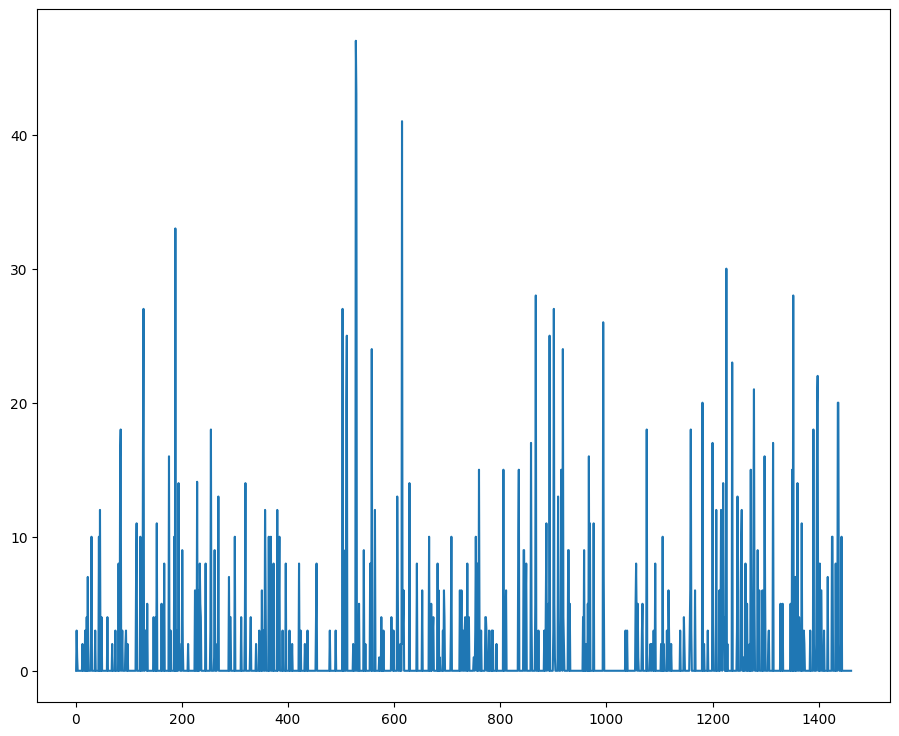

In [33]:
plt.plot(data["Count"])

In [34]:
from statsmodels.tsa.stattools import adfuller
def TestDikiFull(ts):
    alpha = 0.05
    print(f'Тест Дики-Фуллера:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dfoutput["p-value"] < alpha:
        print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
    else:
        print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

In [35]:
TestDikiFull(data["Count"])

Тест Дики-Фуллера:
Test Statistic                  -32.951089
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1460.000000
Critical Value (1%)              -3.434837
Critical Value (5%)              -2.863522
Critical Value (10%)             -2.567825
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


Разложения ряда на компоненты

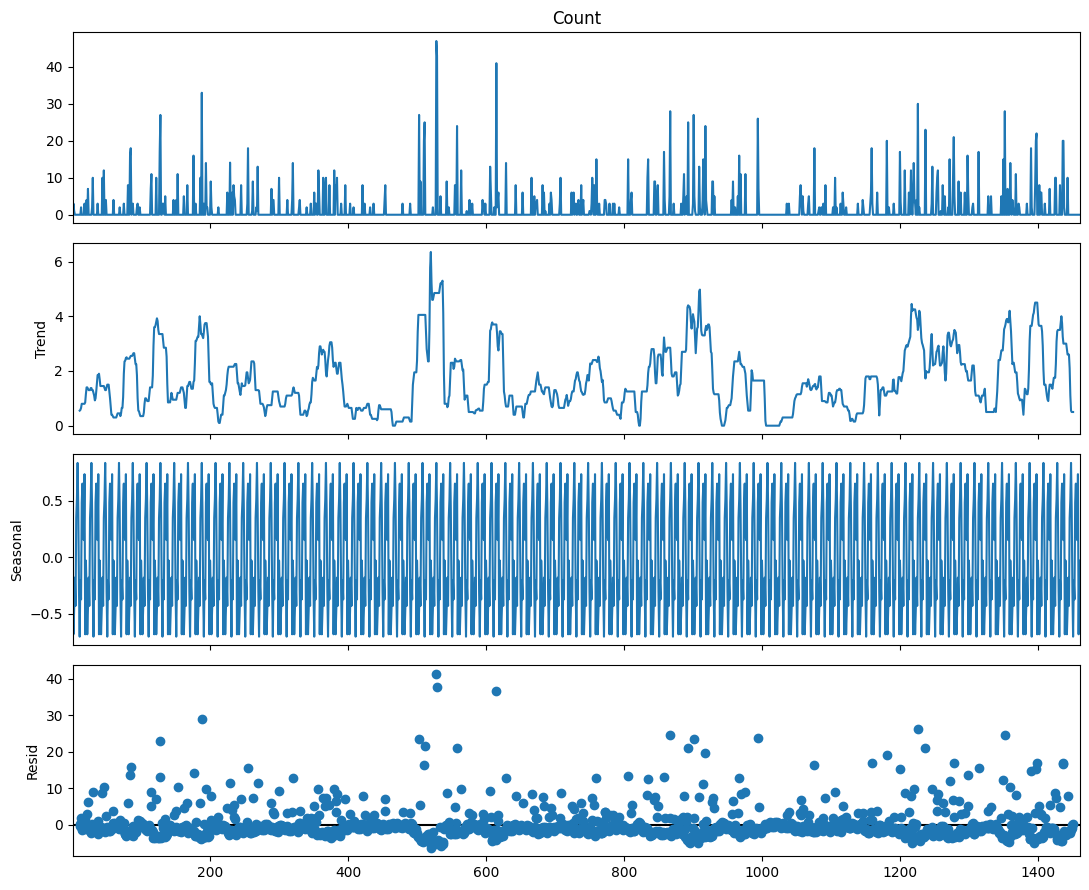

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о перевозках
decompose = seasonal_decompose(data["Count"], period=20)
decompose.plot()
plt.show()

In [37]:
nottrend = []
s = 6
notseason = []

for i in range(2, len(data["Count"])):
   nottrend.append(data["Count"][i] - data["Count"][i-1])

for i in range(s+1, len(data["Count"])):
   notseason.append(data["Count"][i] - data["Count"][i-s])


Тест Дики-Фуллера:
Test Statistic                -1.351191e+01
p-value                        2.842492e-25
#Lags Used                     2.400000e+01
Number of Observations Used    1.434000e+03
Critical Value (1%)           -3.434918e+00
Critical Value (5%)           -2.863558e+00
Critical Value (10%)          -2.567844e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


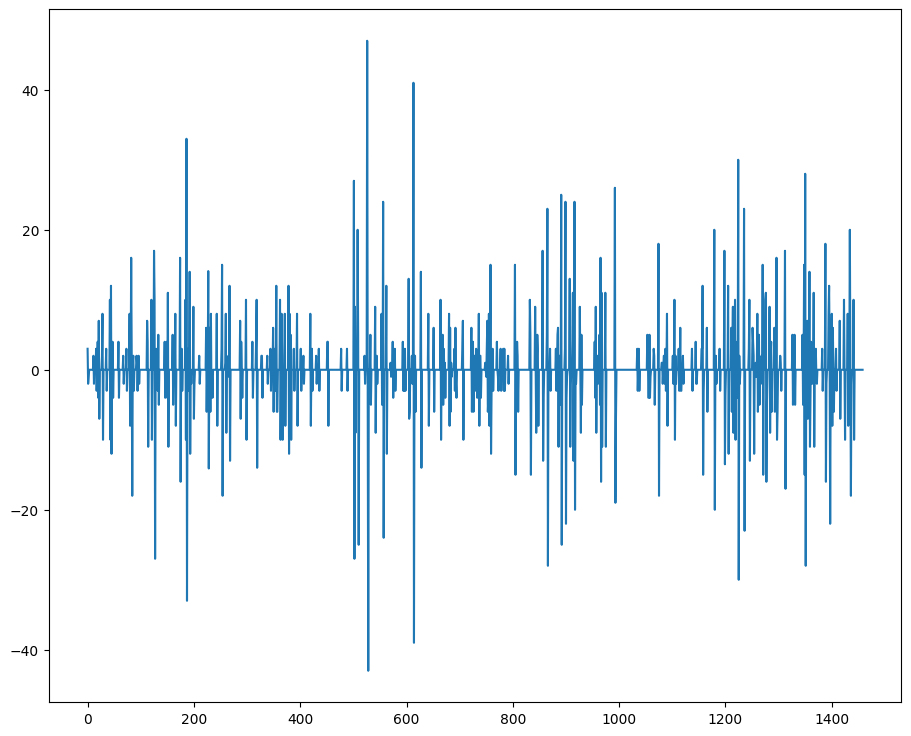

In [40]:
TestDikiFull(nottrend)
plt.plot(nottrend)

Тест Дики-Фуллера:
Test Statistic                -1.221313e+01
p-value                        1.151608e-22
#Lags Used                     2.400000e+01
Number of Observations Used    1.429000e+03
Critical Value (1%)           -3.434934e+00
Critical Value (5%)           -2.863565e+00
Critical Value (10%)          -2.567848e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


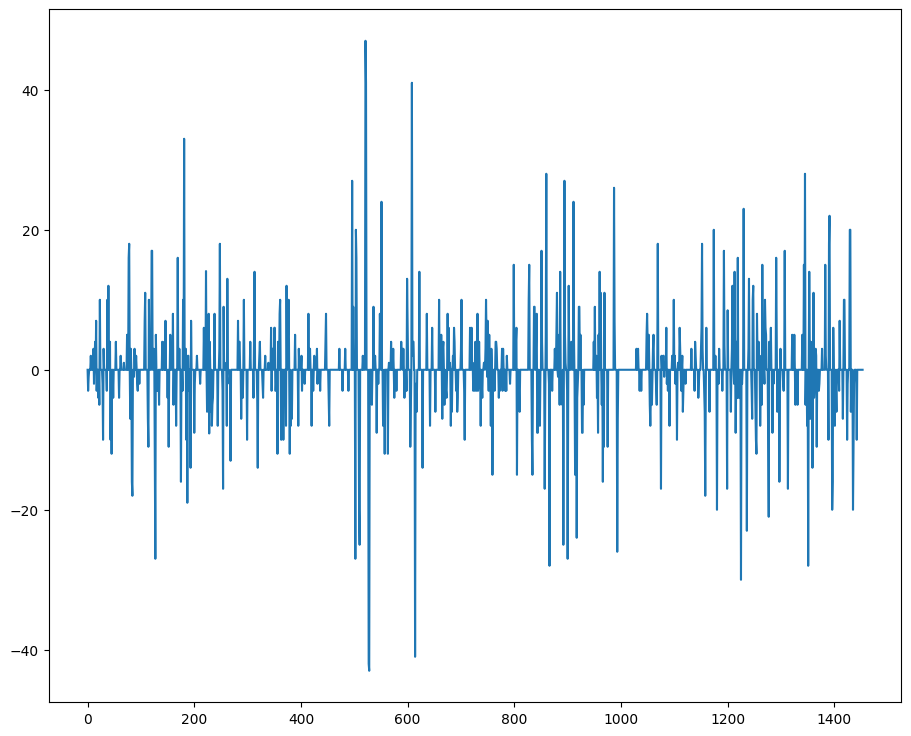

In [41]:
TestDikiFull(notseason)
plt.plot(notseason)

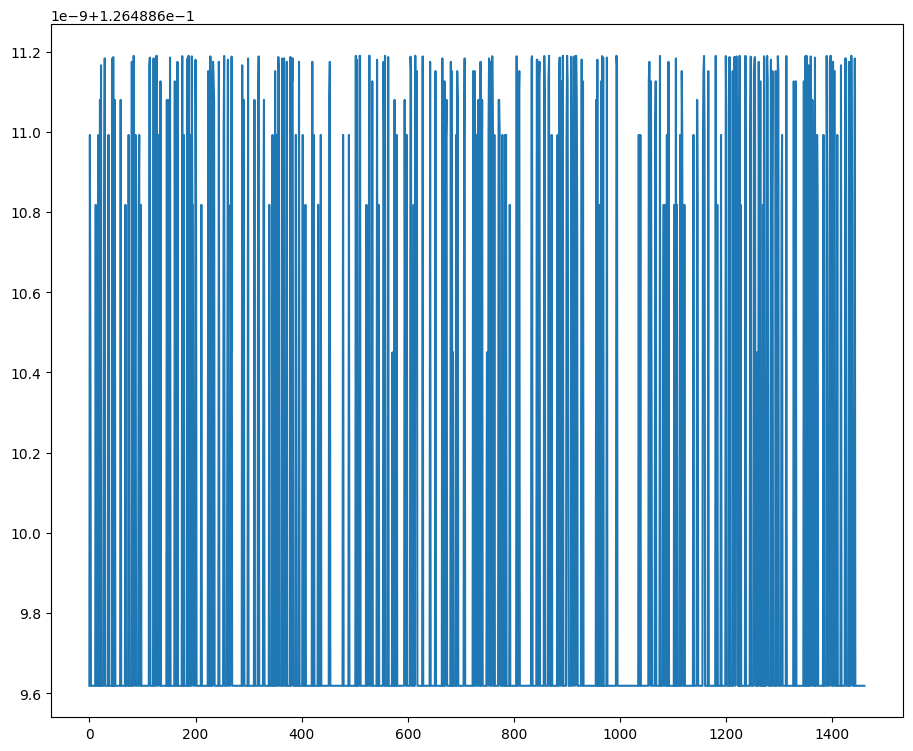

In [42]:
# Преобразование Бокса-Кокса
from scipy.stats import boxcox 

# вызываем функцию преобразования, которая выдает преобразованные данные и
# лучший параметр лямбда, который обеспечивает близость к нормальному
# распределению
data["CountP"] = data["Count"] + 10
transformed_data, best_lambda = boxcox(data["CountP"]) 

# а теперь посмотрим на преобразованные данные
plt.plot(transformed_data) 

Тест Дики-Фуллера:
Test Statistic                -1.291290e+01
p-value                        4.021982e-24
#Lags Used                     2.400000e+01
Number of Observations Used    1.435000e+03
Critical Value (1%)           -3.434915e+00
Critical Value (5%)           -2.863556e+00
Critical Value (10%)          -2.567843e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


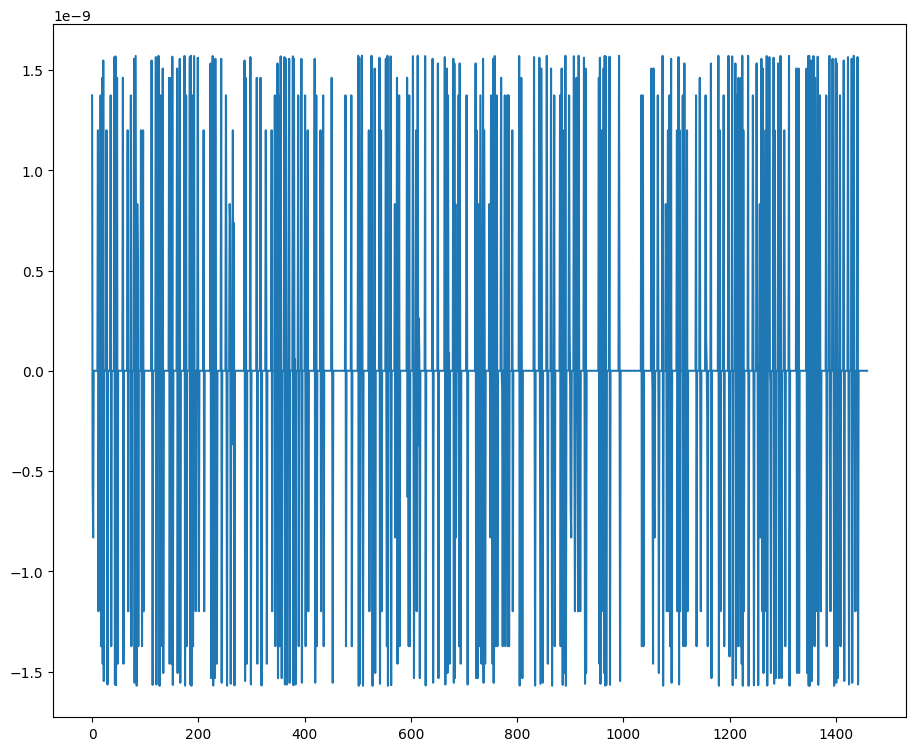

In [44]:
pnottrend = []

for i in range(1, len(transformed_data)):
   pnottrend.append(transformed_data[i] - transformed_data[i-1])

TestDikiFull(pnottrend)
plt.plot(pnottrend) 

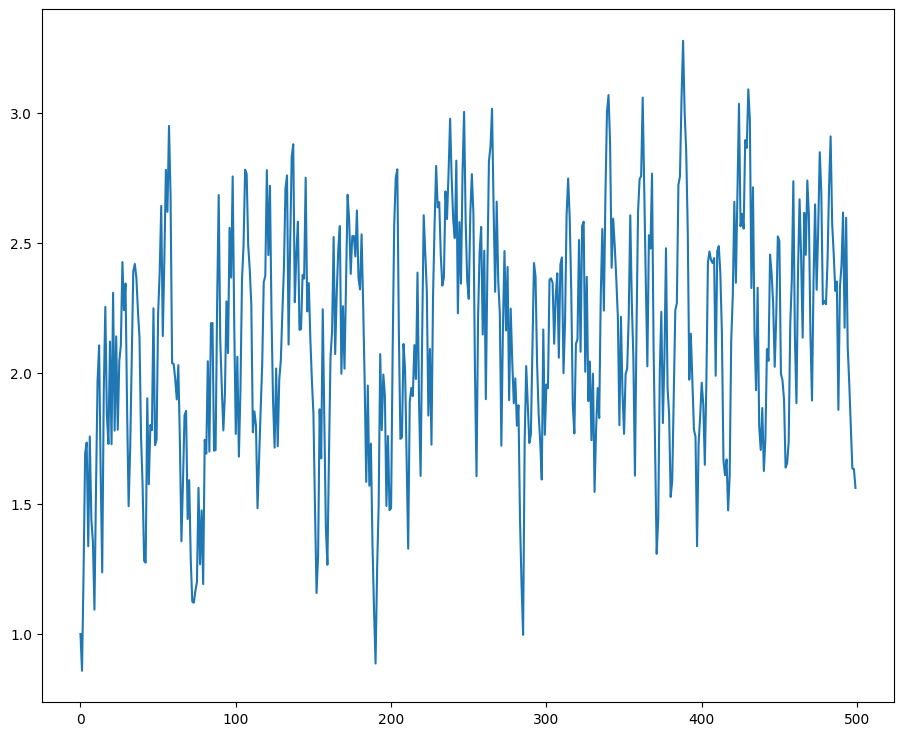

In [45]:
# AR(1)
N = 500

ar1 = [1]

for i in range(1, N):
    ar1.append(0.76 * ar1[i-1] + np.random.random())

plt.plot(ar1)

In [46]:
print(f"standart deviation = {np.std(ar1)}\n mean = {np.mean(ar1)}")

standart deviation = 0.443577717560289
 mean = 2.1327809712254484


standart deviation = 0.4641116466848249
 mean = 0.2752616918884961


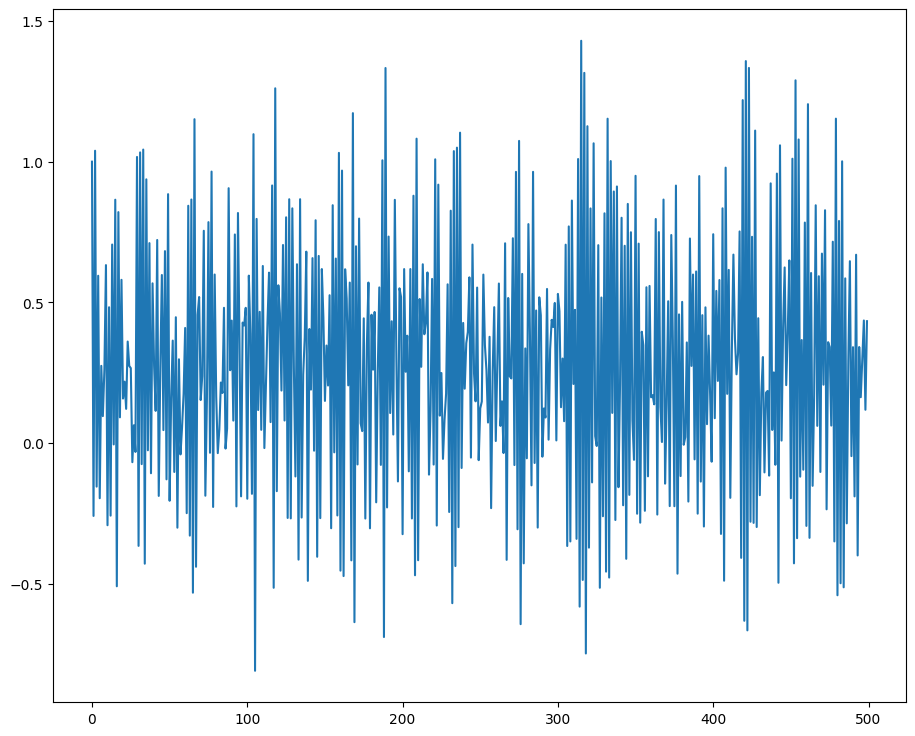

In [47]:
# AR(1)

N = 500

ar2 = [1]

for i in range(1, N):
    ar2.append(- 0.76*ar2[i-1] + np.random.random())

plt.plot(ar2)

print(f"standart deviation = {np.std(ar2)}\n mean = {np.mean(ar2)}")

In [48]:
df = pd.read_csv('Total daily precipitation Fisher River near Dallas Jan 01 1988 to Dec .csv', names=["n","x"], skiprows=1)


df['t'] = df.index.values

ln = len(df)

train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

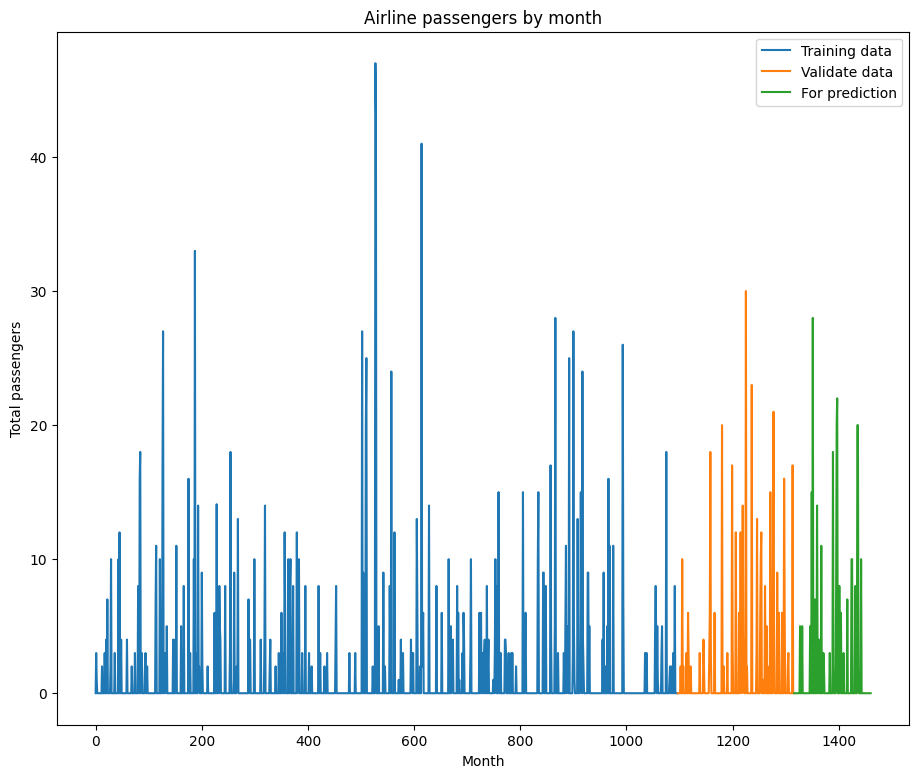

In [49]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.legend()
plt.title('Airline passengers by month')
plt.ylabel('Total passengers')
plt.xlabel('Month')
plt.show()

In [51]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [52]:
mod = AutoReg(df.t, 3, old_names=False)

res = mod.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                 1461
Model:                     AutoReg(3)   Log Likelihood               32100.354
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Thu, 19 Oct 2023   AIC                         -64190.709
Time:                        23:49:47   BIC                         -64164.285
Sample:                             3   HQIC                        -64180.851
                                 1461                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   1.16e-12   5.75e+11      0.000       0.667       0.667
t.L1           1.0000   1.16e-12   8.64e+11      0.000       1.000       1.000
t.L2           0.3333   1.38e-15   2.42e+14      0.0

In [53]:
res = mod.fit(cov_type="HC0")

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                 1461
Model:                     AutoReg(3)   Log Likelihood               32100.354
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Thu, 19 Oct 2023   AIC                         -64190.709
Time:                        23:50:01   BIC                         -64164.285
Sample:                             3   HQIC                        -64180.851
                                 1461                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   7.33e-13   9.09e+11      0.000       0.667       0.667
t.L1           1.0000   7.32e-13   1.37e+12      0.000       1.000       1.000
t.L2           0.3333   1.51e-15   2.21e+14      0.0

In [54]:
sel = ar_select_order(df.x, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                 1461
Model:                     AutoReg(1)   Log Likelihood               -4258.332
Method:               Conditional MLE   S.D. of innovations              4.472
Date:                Thu, 19 Oct 2023   AIC                           8522.664
Time:                        23:50:16   BIC                           8538.523
Sample:                             1   HQIC                          8528.580
                                 1461                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3820      0.124     11.118      0.000       1.138       1.626
x.L1           0.1463      0.026      5.652      0.000       0.096       0.197
                                    Roots           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


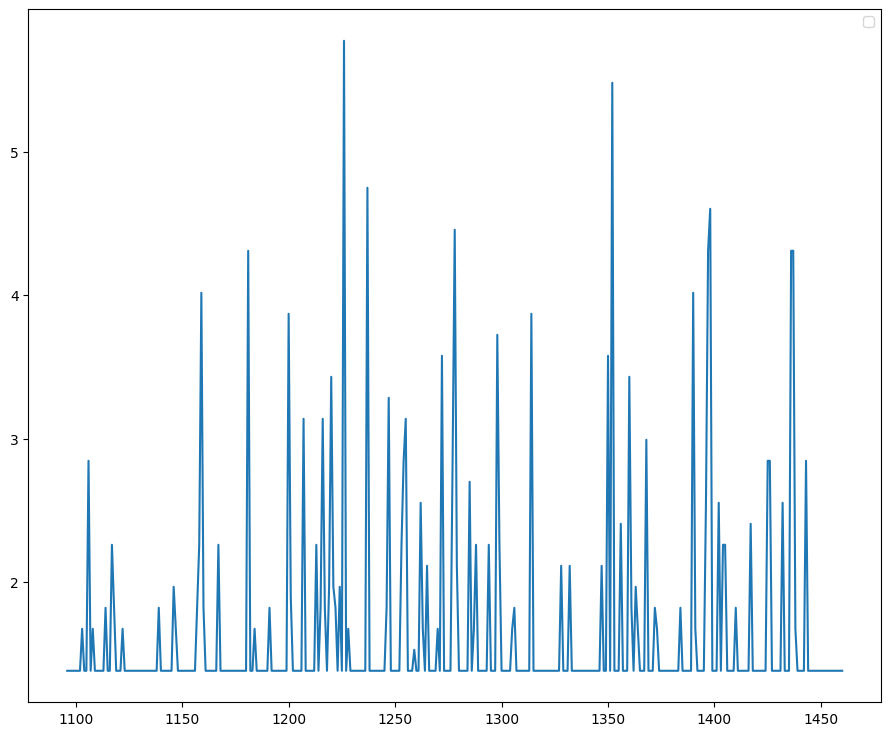

In [55]:
fig = res.plot_predict(train_cutoff)

In [56]:
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(forecast_df.t[len(df.t)-1]), dynamic=False)

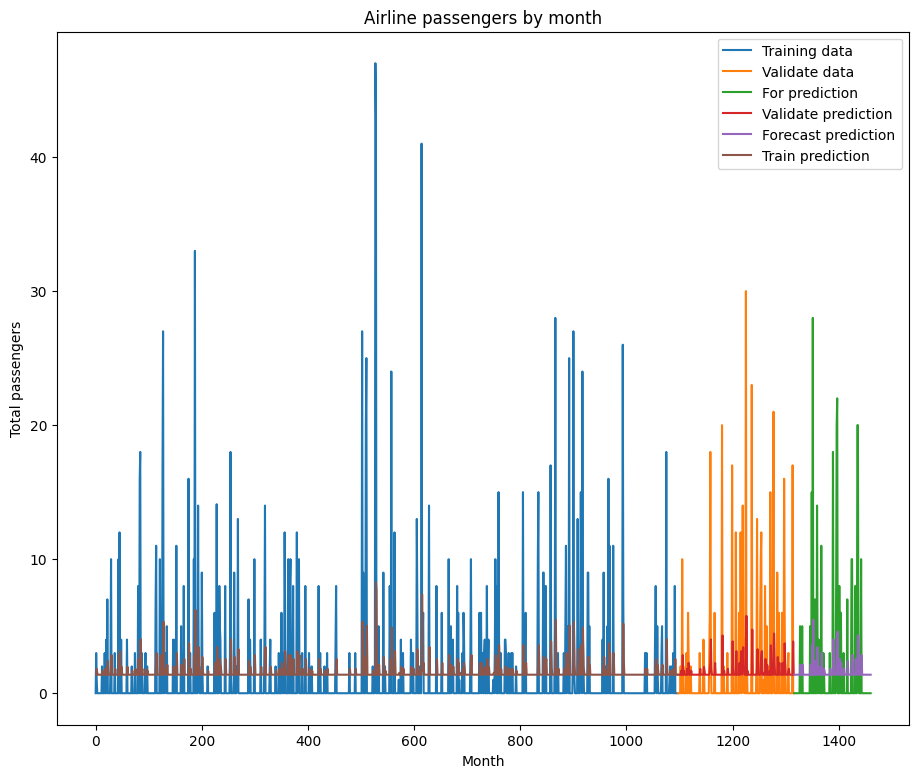

In [57]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.plot(validate_df.t, v_pred, label='Validate prediction ')
plt.plot(forecast_df.t, f_pred, label='Forecast prediction')
plt.plot(train_df.t, pred, label='Train prediction')

plt.legend()
plt.title('Airline passengers by month')
plt.ylabel('Total passengers')
plt.xlabel('Month')
plt.show()

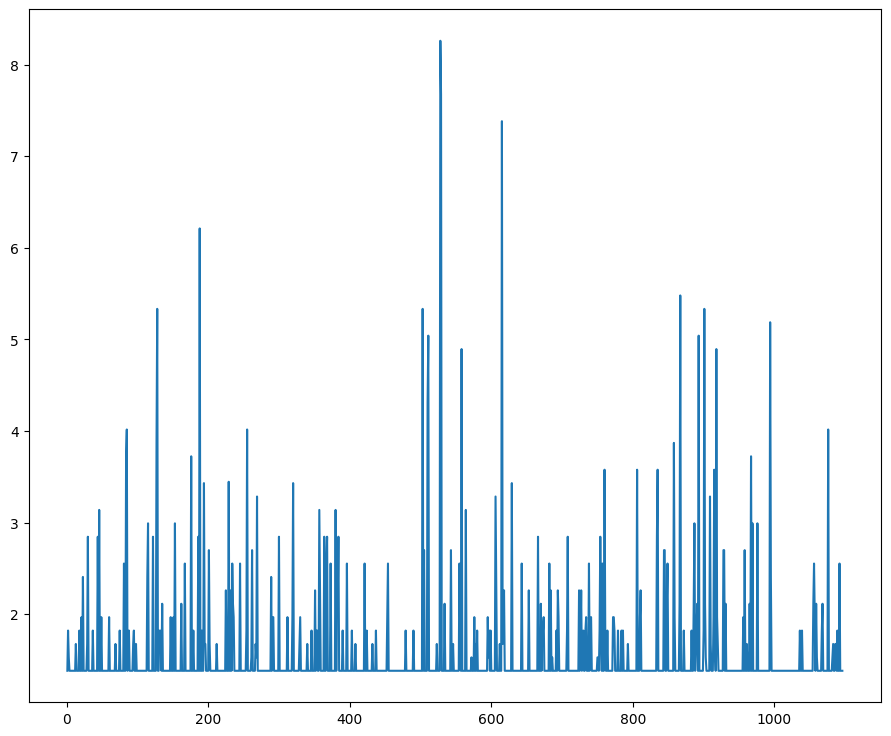

In [58]:
plt.plot(pred)

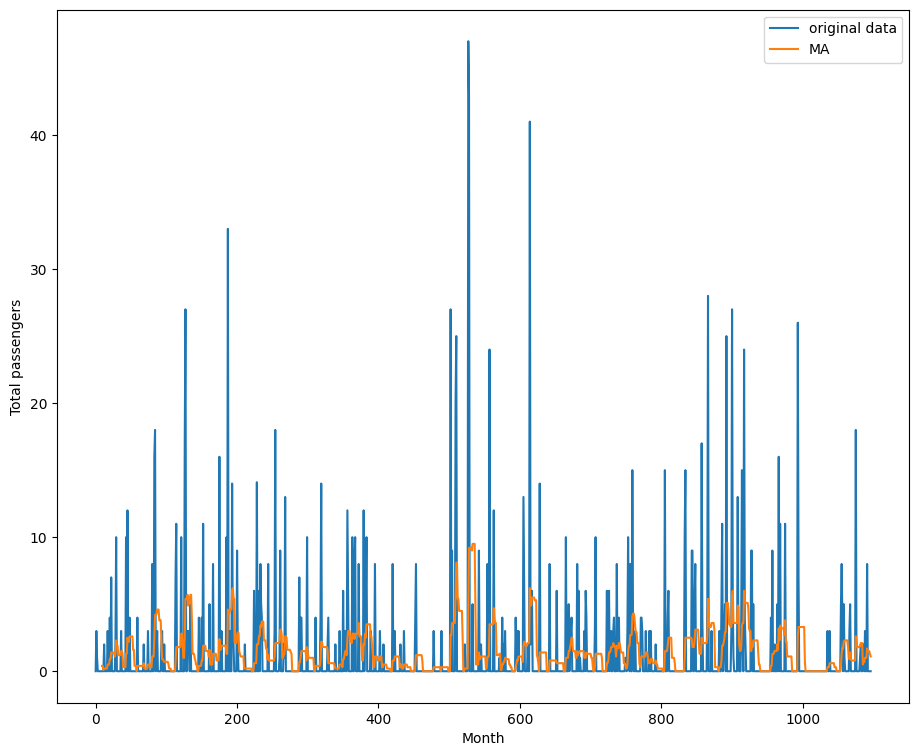

In [59]:
df['t'] = df.index.values

ln = len(df)

train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df["t"], train_df["x"], label="original data")
plt.plot(train_df["t"], train_df["x"].rolling(10).mean(), label="MA")
plt.legend()
plt.ylabel('Total passengers')
plt.xlabel('Month')
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

In [61]:
print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2: ", r2_score(forecast_df.x, f_pred))

RMSE: 4.882257153572497
MAPE: 5638732969203520.0
MAE: 2.877356736645068
R2:  0.03210777414096455
